In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [5]:
df=pd.read_csv("data.csv")


In [75]:
missing = df.isnull().sum()
missing[missing > 0]


Series([], dtype: int64)

In [6]:
df.head(20)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
5,TransactionId_23223,BatchId_25954,AccountId_1078,SubscriptionId_4238,CustomerId_1432,UGX,256,ProviderId_6,ProductId_3,airtime,ChannelId_3,2000.0,2000,2018-11-15T03:35:10Z,2,0
6,TransactionId_118063,BatchId_118460,AccountId_2442,SubscriptionId_1980,CustomerId_2858,UGX,256,ProviderId_5,ProductId_3,airtime,ChannelId_3,10000.0,10000,2018-11-15T03:44:31Z,4,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15T03:45:13Z,2,0
8,TransactionId_51905,BatchId_93774,AccountId_272,SubscriptionId_4731,CustomerId_598,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,500.0,500,2018-11-15T04:14:59Z,2,0
9,TransactionId_130161,BatchId_82409,AccountId_710,SubscriptionId_920,CustomerId_1053,UGX,256,ProviderId_1,ProductId_15,financial_services,ChannelId_3,600.0,600,2018-11-15T04:31:48Z,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [8]:
df.describe()


,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [9]:
df['ProductCategory'].unique()

array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
       'tv', 'transport', 'ticket', 'movies', 'other'], dtype=object)

In [10]:
df['ChannelId'].unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5'],
      dtype=object)

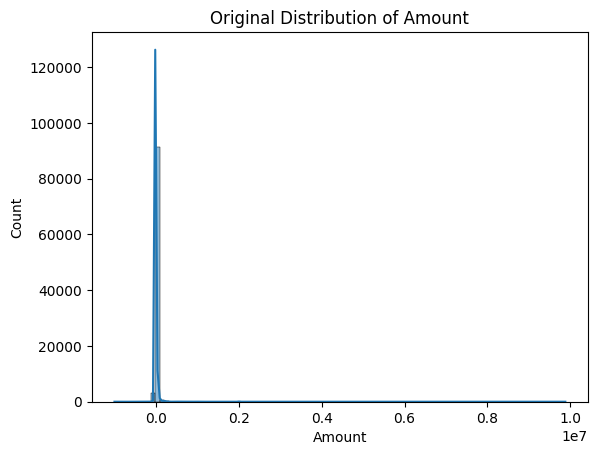

In [60]:
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Original Distribution of Amount")
plt.show()


In [33]:
len(df)

95662

In [56]:
# Calculate IQR bounds
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Cap the outliers
df['Amount_capped'] = df['Amount'].clip(lower=lower_bound, upper=upper_bound)


Lower Bound: -4325.0, Upper Bound: 7075.0


In [58]:
Q1_val = df['Value'].quantile(0.25)
Q3_val = df['Value'].quantile(0.75)
IQR_val = Q3_val - Q1_val

lower_val = Q1_val - 1.5 * IQR_val
upper_val = Q3_val + 1.5 * IQR_val

print(f"Lower Value: {lower_val}, Upper Bound: {upper_val}")


df['Value_capped'] = df['Value'].clip(lower=lower_val, upper=upper_val)


Lower Value: -6812.5, Upper Bound: 12087.5


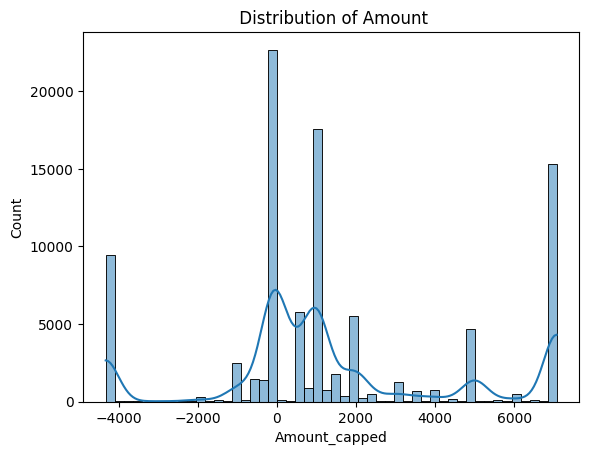

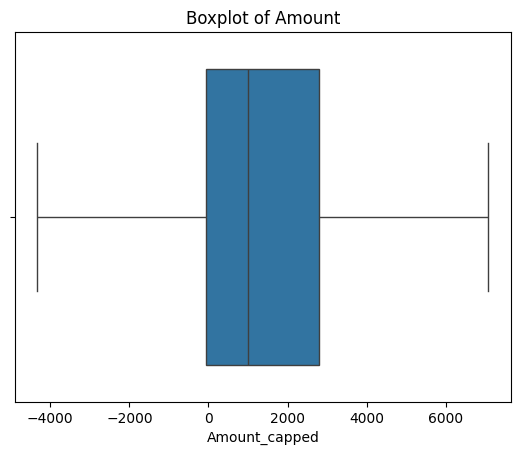

In [61]:
sns.histplot(df['Amount_capped'], bins=50, kde=True)
plt.title(" Distribution of Amount")
plt.show()

sns.boxplot(x=df['Amount_capped'])
plt.title("Boxplot of Amount")
plt.show()


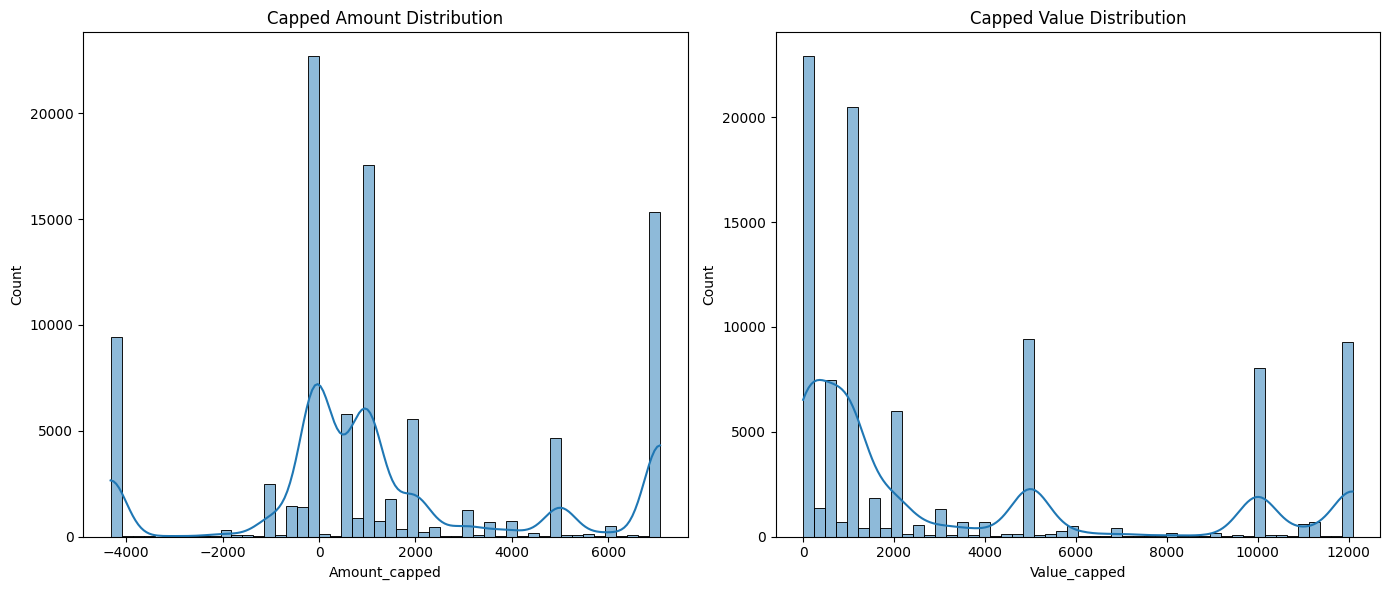

In [68]:
# Plot distributions of capped values
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(df['Amount_capped'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("Capped Amount Distribution")

sns.histplot(df['Value_capped'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("Capped Value Distribution")

plt.tight_layout()
plt.show()


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [ ]:
df['ProviderId'].unique()

array(['ProviderId_6', 'ProviderId_4', 'ProviderId_1', 'ProviderId_5',
       'ProviderId_3', 'ProviderId_2'], dtype=object)

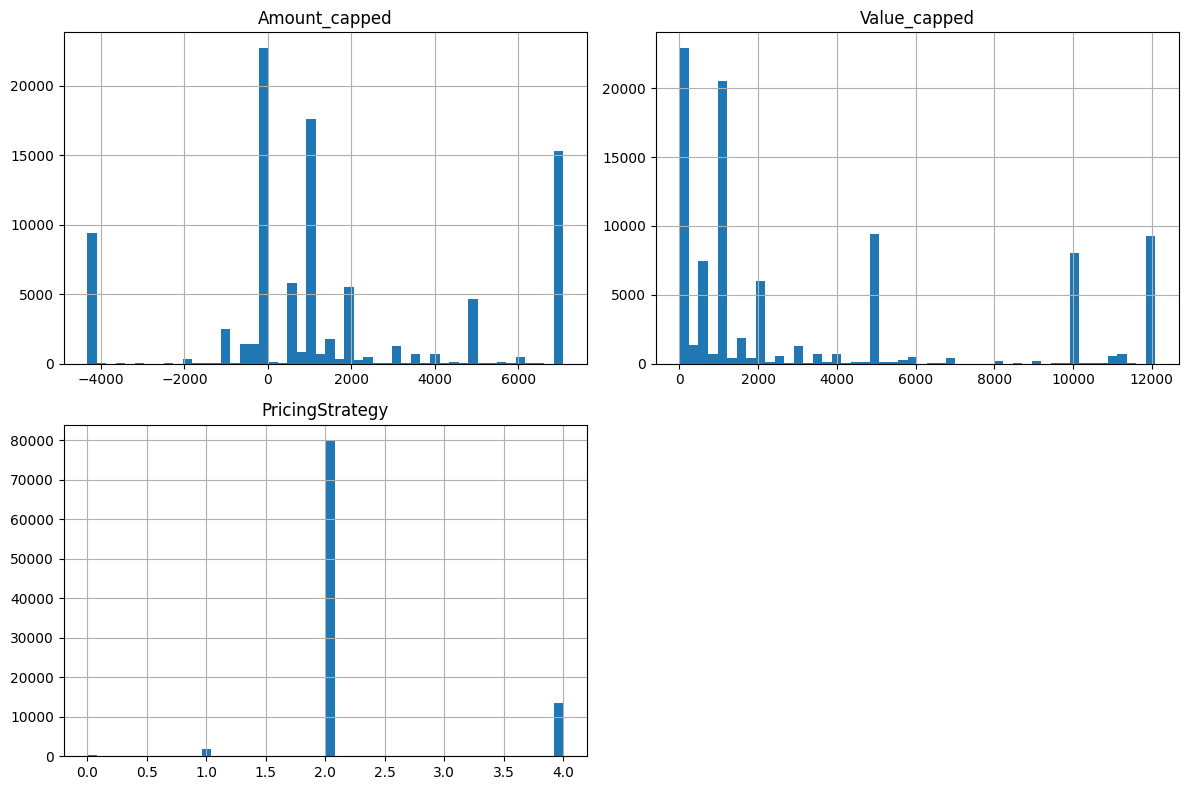

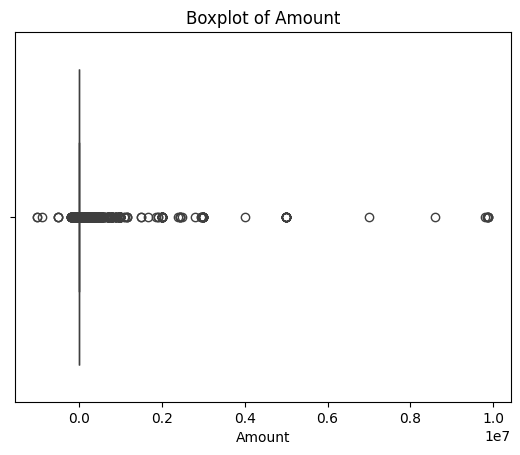

In [82]:
numerical_cols = ['Amount_capped', 'Value_capped', 'PricingStrategy'] 
df[numerical_cols].hist(bins=50, figsize=(12, 8))
plt.tight_layout()
plt.show()

# Boxplot for outlier detection
sns.boxplot(x=df['Amount'])
plt.title("Boxplot of Amount")
plt.show()


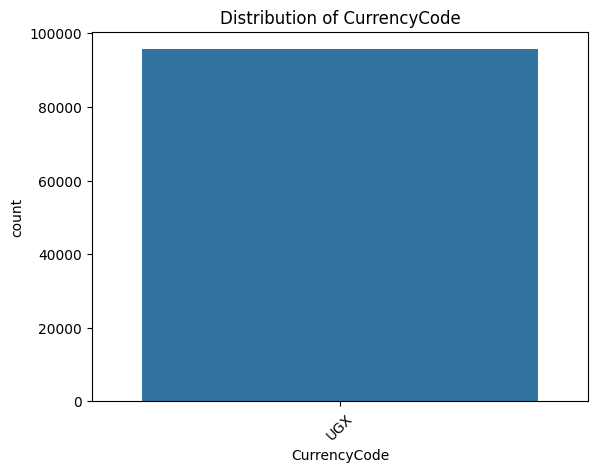

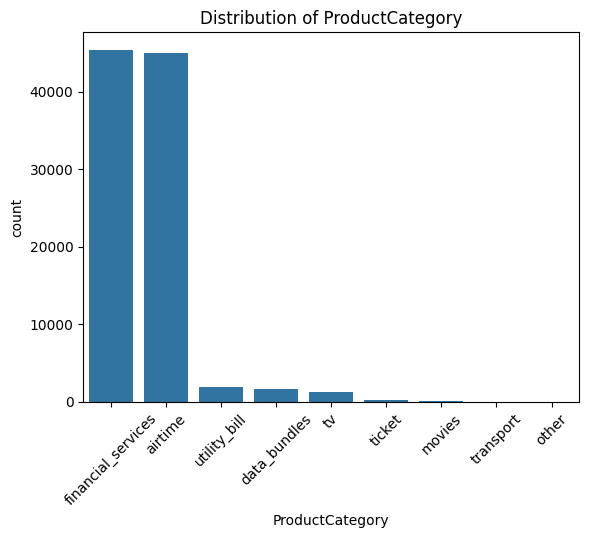

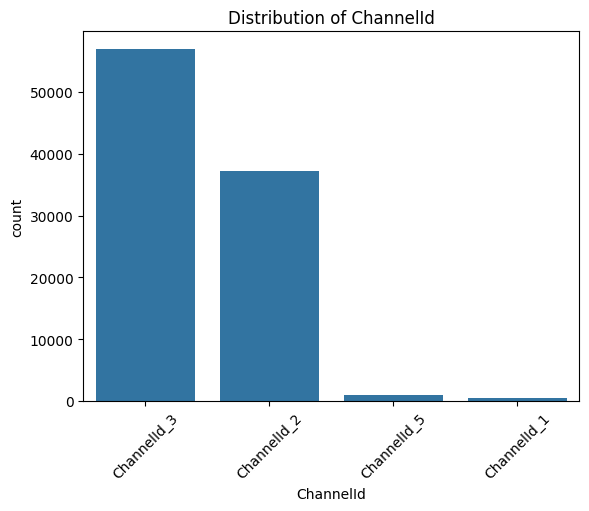

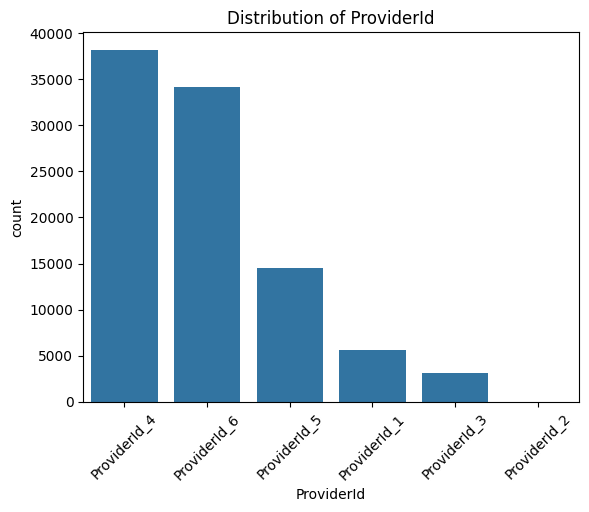

In [74]:
categorical_cols = ['CurrencyCode', 'ProductCategory', 'ChannelId', 'ProviderId']

for col in categorical_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


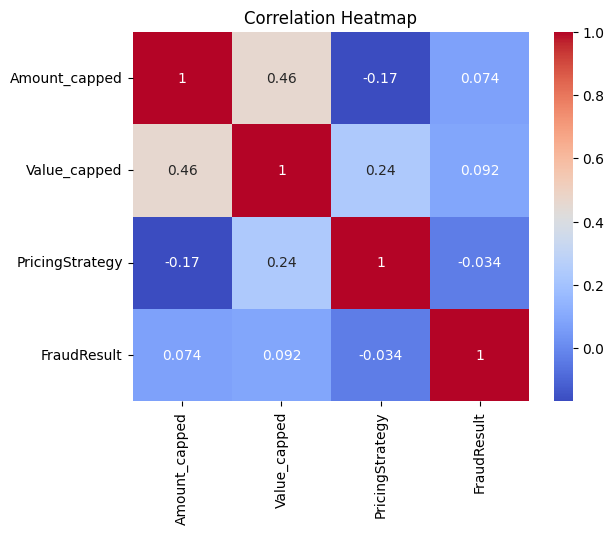

In [ ]:
# Correlation heatmap
corr = df[['Amount_capped', 'Value_capped', 'PricingStrategy', 'FraudResult']].corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
